In [12]:
import pandas as pd
import os

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11, 4)})

## Reading the Data

In [ ]:
claims_datas = [f"claims_{i}" for i in range(1, 6)]

In [8]:
claims_datas

['claims_1', 'claims_2', 'claims_3', 'claims_4', 'claims_5']

In [17]:
cd ..

/Users/deniztokmakoglu/CAPP30254_Project


In [22]:
claims = pd.read_csv("Data/claims1.csv")

In [26]:
for i in range(2, 6):
    claims = claims.append(pd.read_csv(f"Data/claims{i}.csv"))

In [27]:
claims

,Unnamed: 0,reimb2010,reimb2008,reimb2009,age2010,male,race,heart.failure,kidney,cancer,...,OfficeVisit,EyeExam,EKG,xray,CTScan,PhysicalTherapy,Ambulance,acuity,costTrend,monthsWithClaims
0,0,390,320.0,360,97,0,White,0,0,0,...,4,1,0,1,0,0,0,0.235294,-0.018856,9
1,1,970,58800.0,2740,79,0,White,1,1,0,...,12,0,2,8,1,0,1,0.853591,-0.027265,21
2,2,5630,510.0,1580,87,0,White,1,0,0,...,10,0,1,2,1,1,0,0.175115,0.496742,20
3,3,3480,2930.0,49330,79,0,White,1,1,0,...,14,1,1,6,4,3,3,0.709147,0.214955,19
4,4,920,1500.0,1650,85,1,White,1,0,1,...,16,2,1,3,0,1,0,0.174603,0.231568,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204783,1023947,6620,2090.0,4070,54,1,Block,1,0,0,...,12,3,3,5,0,0,3,0.194805,0.333441,22
204784,1023948,490,12450.0,1560,70,1,White,1,1,0,...,6,0,0,2,0,0,1,0.722341,-0.129291,15
204785,1023949,690,1370.0,2440,75,0,Other,1,1,0,...,12,1,2,6,1,2,2,0.207349,0.183677,19
204786,1023950,1140,6530.0,9220,78,0,White,0,1,1,...,20,0,4,2,2,1,0,0.121905,0.117923,23


In [29]:
import numpy as np
import warnings
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

In [44]:
def normalize(df, scaler=None):
    '''
    If scaler is not none, use given scaler's means and sds to normalize
    (used for test set case)
    '''
    #Normalizing train set
    if(scaler is None):
        scaler = StandardScaler()
        normalized_features = scaler.fit_transform(df)
    #Normalizing test set
    else:
        normalized_features = scaler.transform(df)
        outcomes = df.iloc[:,-1]
        normalized_df = pd.DataFrame(normalized_features)
    normalized_df.index=df.index
    normalized_df.columns=df.columns
    return normalized_df, scaler

In [45]:
train, test = train_test_split(
claims,
test_size=0.20, random_state = 505)

In [46]:
df_train, scaler = normalize(train[["OfficeVisit"]])
df_test, _ = normalize(test[["OfficeVisit"]], scaler)

UnboundLocalError: local variable 'normalized_df' referenced before assignment

In [35]:
train_features_officevisit = train.loc[:,"OfficeVisit"]
test_features_officevisit = test.loc[:,"OfficeVisit"]
train_targets_reimb2010 = train.loc[:,"reimb2010"]
test_targets_reimb2010 = test.loc[:,"reimb2010"]

In [37]:
regr = linear_model.LinearRegression()
regr.fit(np.array(train_features_officevisit).reshape(-1,1), train_targets_reimb2010)

LinearRegression()

In [38]:
reimb2010_officevisit_predict = regr.predict(np.array(test_features_officevisit).reshape(-
1,1)) #normalized

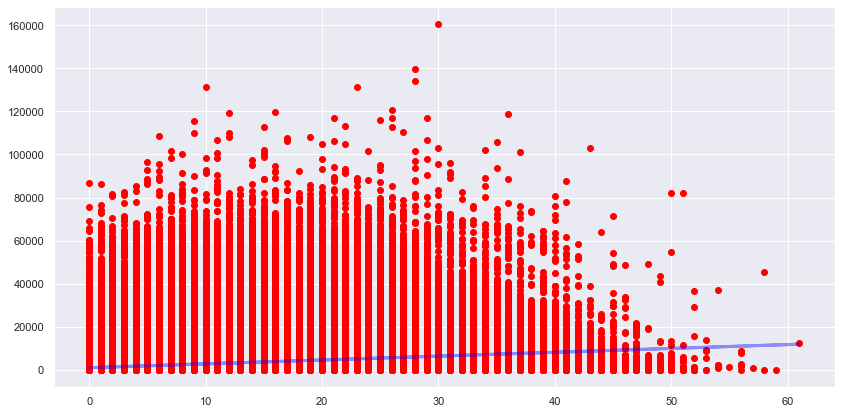

In [41]:
plt.figure(figsize=(14,7))
x = claims["OfficeVisit"]
x_test = test["OfficeVisit"]
y = claims["reimb2010"]
plt.plot(x, y, '.', color='red', markersize=12)
plt.plot(np.array(x_test), reimb2010_officevisit_predict, color='blue', alpha=0.4,
linewidth=3)
plt.show()